# `20181104a` `20181104b`  `20181104c`- Phantom and probes


In [1]:
#!/usr/bin/python
import spidev
import RPi.GPIO as GPIO
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import json
import time
from pyUn0 import *
%matplotlib inline

pyexiv2 does not exist on RPi


In [23]:
x = us_spi()
x.JSON["firmware_version"]="f_un0"
x.JSON["experiment"]["description"]="Trying the blueatl probe"
x.JSON["experiment"]["probe"]="blueatl"
x.JSON["experiment"]["target"] = "wiretwophantom"
x.JSON["experiment"]["id"] = "20181104c"
x.JSON["V"]="50"
x.JSON["N"] = 1 # Experiment ID

In [24]:
x.init()                                    # Inits the FPGA

Curve = x.CreateDACCurve(200,500,True)[0]   # Sets the DAC, 50mV to 850mv

Reset GPIO 23 - Low 1s
Reset GPIO 23 - High 0.2s
spi.cshigh is False
spi mode is 1
spi maxspeed is 2000000hz
Setting up the DAC


In [25]:
#x.TestSPI(3)
x.JSON["N"] = 1 

In [26]:
Curve = x.CreateDACCurve(300,700,True)[0]
print Curve

Setting up the DAC
[300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 0, 0]


In [27]:
x.setPeriodAcq(int(2500000))

Period between two acquisitions: 250000 us -- 0x3 0xd0 0x90


2500000

In [28]:
x.setMultiLines(True)				        # Multi lines acquisition	
x.setNLines((256+128))				            # Setting the number of lines
x.setMsps(2) 					            # Acquisition Freq
print("-----")
A = x.setTimings(200,100,2000,55000,115000)	# Settings the series of pulses

Remember to indicate how many lines
Number of lines: 384
Acquisition frequency set at 21.0 Msps
-----
Pulse width: 200  ns --  0x14
Pulses delay: 300  ns --  0x1e
Poff: 2300  ns --  0x0 0xe6
Delay between: 55000 ns --  0x1b 0x80
Acquisition length:  115000 ns --  0x39 0x80
setPulseTrain Lacq 115000
        
NAcq = 483840


In [29]:
x.JSON["experiment"]["description"]="blue ATL tested with wiretwophantom"
x.JSON["data"] = x.doAcquisition()
x.JSON["N"] = x.JSON["N"] + 1 

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Took 91.09 seconds to transfer.
for 967682 transfers of data
20181104c-1.json: file saved.


In [55]:
LastJSON = x.JSON["N"] -1
print LastJSON

6


In [56]:
for MyDataFile in os.listdir("./"):
    if MyDataFile.endswith(str(LastJSON)+".json"):
        y = us_json()
        y.JSONprocessing("./"+MyDataFile)

Data acquired


In [57]:
print(len(y.tmp))

11970


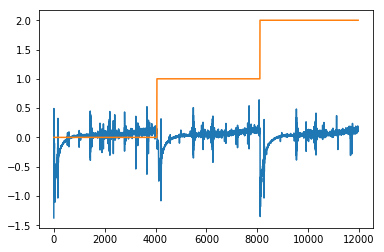

In [58]:
plt.plot(y.tmp)
plt.plot(y.IDLine)
plt.show()

In [34]:
x.NLines, y.Nacq

(3, 3)